# 펭귄 데이터셋 분석 및 시각화

이 노트북은 Seaborn의 펭귄 데이터셋을 로드하여 다양한 시각화와 통계 분석을 수행합니다.

## 1. 필요한 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 시각화 설정
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
sns.set_palette("husl")

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
print("라이브러리 임포트 완료!")

라이브러리 임포트 완료!


## 2. 펭귄 데이터셋 로드

In [3]:
# 펭귄 데이터셋 로드
df = sns.load_dataset('penguins')
print("데이터셋 로드 완료!")
print(f"\n데이터 형태: {df.shape}")
print(f"\n처음 5행:\n{df.head()}")

데이터셋 로드 완료!

데이터 형태: (344, 7)

처음 5행:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


## 3. 데이터 탐색 및 전처리

In [4]:
# 데이터 정보 확인
print("=== 데이터 정보 ===")
print(df.info())
print("\n=== 결측치 ===")
print(df.isnull().sum())
print("\n=== 데이터 타입 ===")
print(df.dtypes)

# 결측치 제거
df_clean = df.dropna()
print(f"\n결측치 제거 후 데이터 형태: {df_clean.shape}")

=== 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

=== 결측치 ===
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

=== 데이터 타입 ===
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex    

## 4. 기본 통계 분석

In [5]:
print("=== 기본 통계 분석 ===")
print(df_clean.describe())
print("\n=== 범주형 데이터 ===")
print("종(Species):", df_clean['species'].unique())
print("성별(Sex):", df_clean['sex'].unique())
print("섬(Island):", df_clean['island'].unique())

=== 기본 통계 분석 ===
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

=== 범주형 데이터 ===
종(Species): ['Adelie' 'Chinstrap' 'Gentoo']
성별(Sex): ['Male' 'Female']
섬(Island): ['Torgersen' 'Biscoe' 'Dream']


## 5. 산점도 시각화

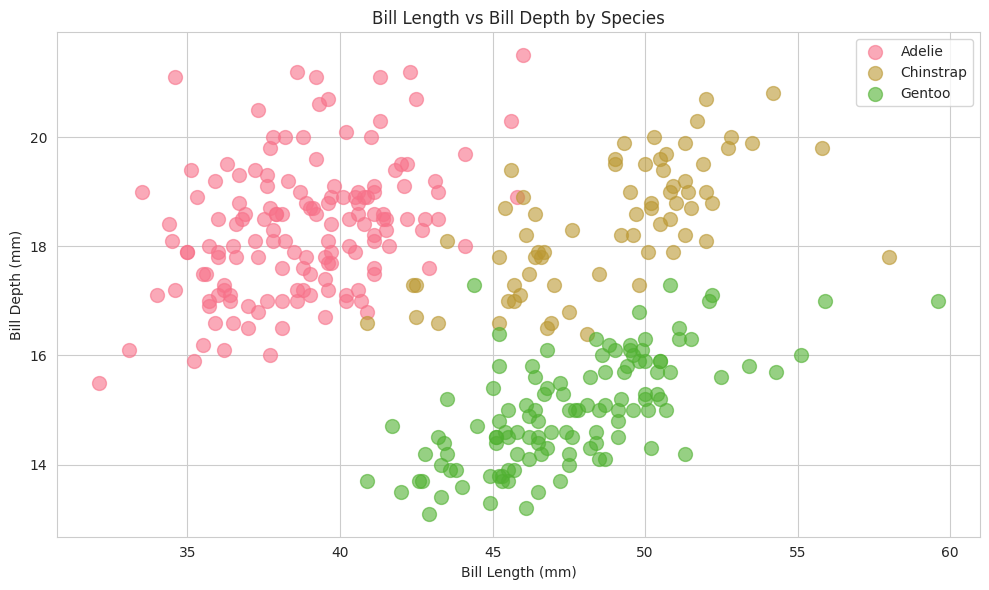

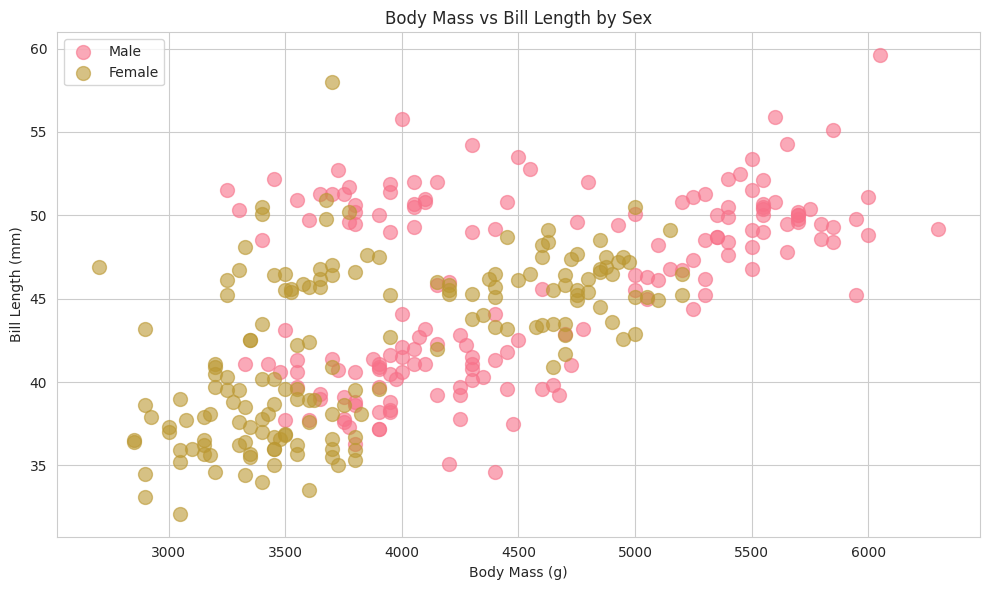

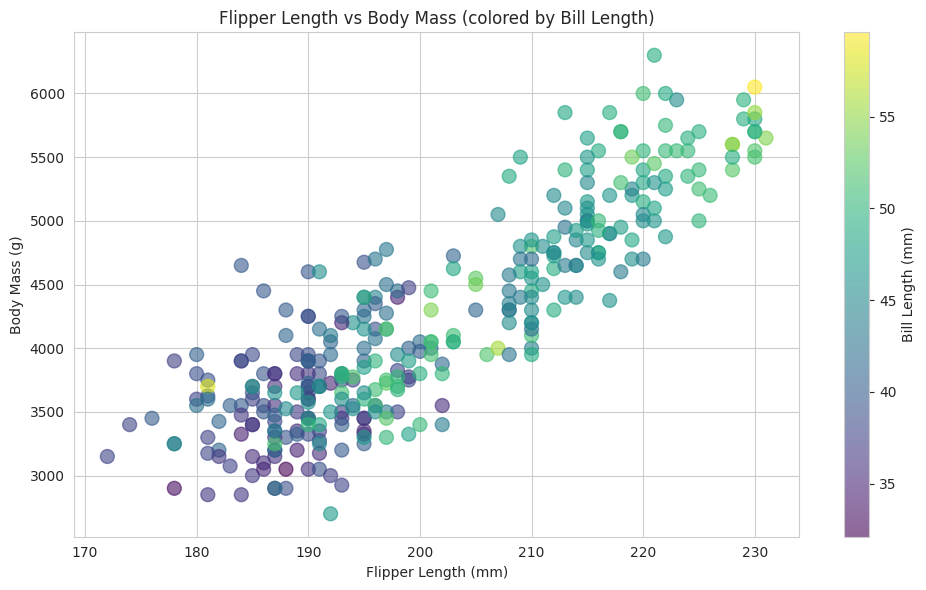

In [6]:
# 그래프 저장 리스트
graph_data = {}

# 1. 부리 길이 vs 부리 깊이 (종별)
fig, ax = plt.subplots(figsize=(10, 6))
for species in df_clean['species'].unique():
    data = df_clean[df_clean['species'] == species]
    ax.scatter(data['bill_length_mm'], data['bill_depth_mm'], label=species, s=100, alpha=0.6)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_title('Bill Length vs Bill Depth by Species')
ax.legend()
plt.tight_layout()
plt.savefig('graph_1_scatter_bill.png', dpi=100, bbox_inches='tight')
graph_data['scatter_1'] = (fig, '부리 길이 vs 부리 깊이')
plt.show()

# 2. 체질량 vs 부리 길이 (성별)
fig, ax = plt.subplots(figsize=(10, 6))
for sex in df_clean['sex'].unique():
    data = df_clean[df_clean['sex'] == sex]
    ax.scatter(data['body_mass_g'], data['bill_length_mm'], label=sex, s=100, alpha=0.6)
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Bill Length (mm)')
ax.set_title('Body Mass vs Bill Length by Sex')
ax.legend()
plt.tight_layout()
plt.savefig('graph_2_scatter_mass.png', dpi=100, bbox_inches='tight')
graph_data['scatter_2'] = (fig, '체질량 vs 부리 길이')
plt.show()

# 3. 날개 길이 vs 체질량
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df_clean['flipper_length_mm'], df_clean['body_mass_g'], 
                     c=df_clean['bill_length_mm'], cmap='viridis', s=100, alpha=0.6)
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Body Mass (g)')
ax.set_title('Flipper Length vs Body Mass (colored by Bill Length)')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Bill Length (mm)')
plt.tight_layout()
plt.savefig('graph_3_scatter_flipper.png', dpi=100, bbox_inches='tight')
graph_data['scatter_3'] = (fig, '날개 길이 vs 체질량')
plt.show()

## 6. 히스토그램 시각화

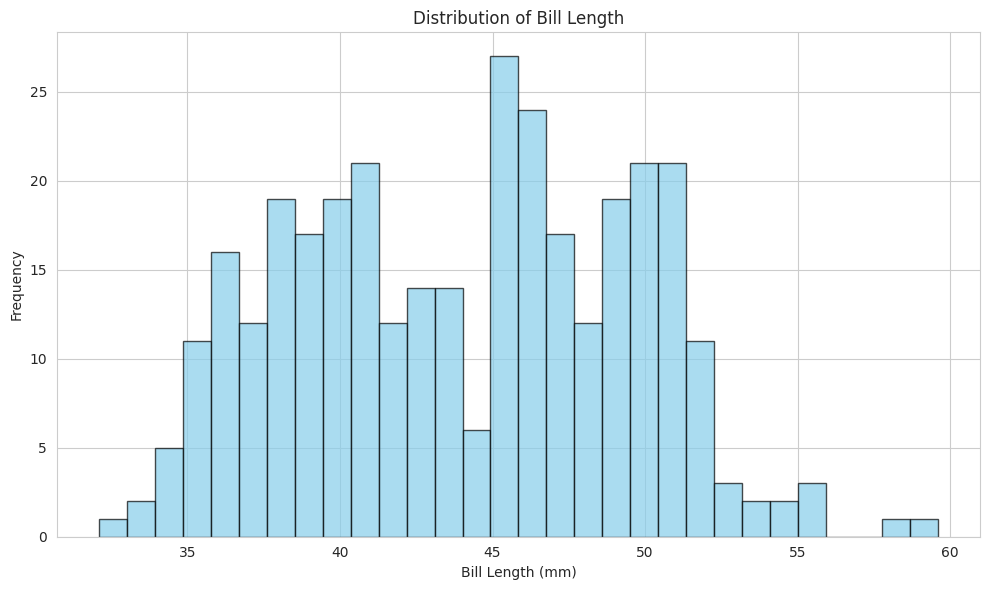

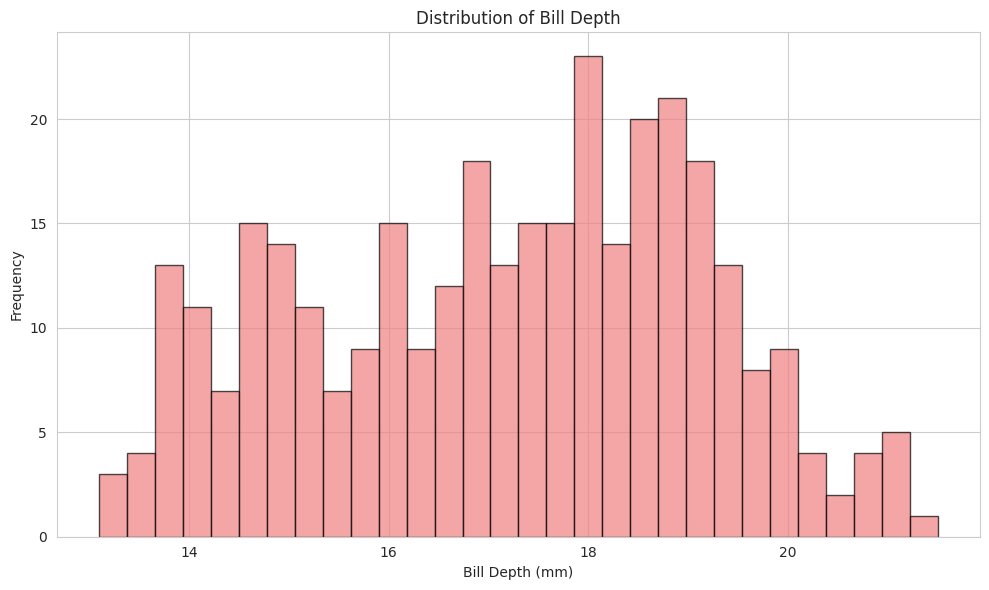

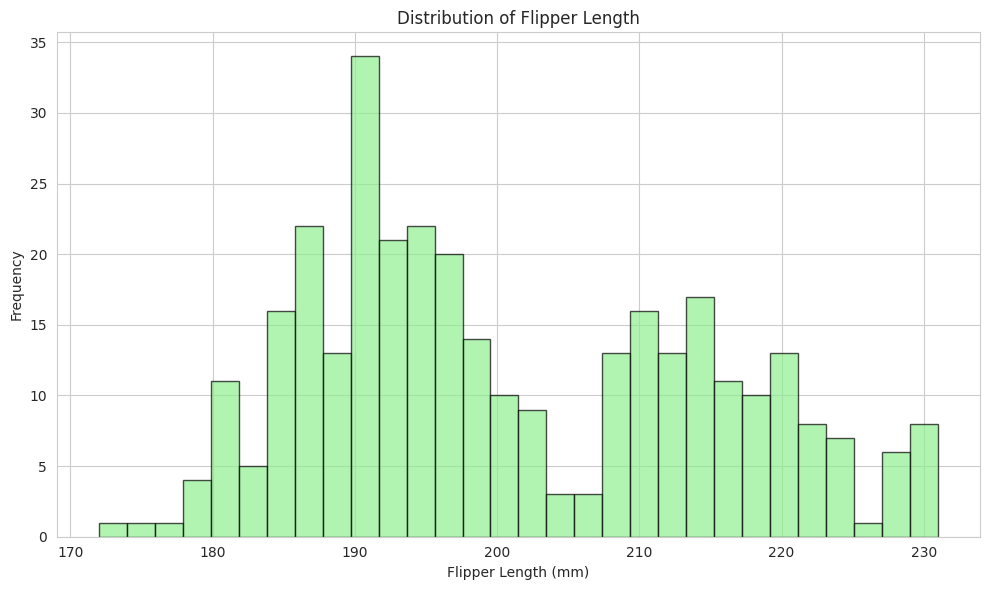

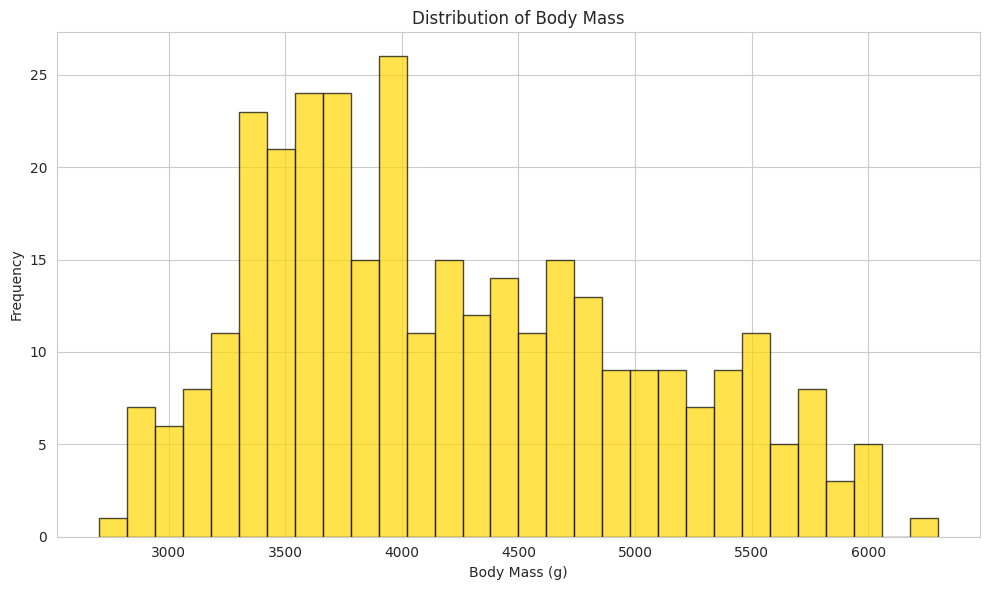

In [7]:
# 4. 부리 길이 히스토그램
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_clean['bill_length_mm'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Bill Length')
plt.tight_layout()
plt.savefig('graph_4_hist_bill_length.png', dpi=100, bbox_inches='tight')
graph_data['hist_1'] = (fig, '부리 길이 히스토그램')
plt.show()

# 5. 부리 깊이 히스토그램
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_clean['bill_depth_mm'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Bill Depth (mm)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Bill Depth')
plt.tight_layout()
plt.savefig('graph_5_hist_bill_depth.png', dpi=100, bbox_inches='tight')
graph_data['hist_2'] = (fig, '부리 깊이 히스토그램')
plt.show()

# 6. 날개 길이 히스토그램
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_clean['flipper_length_mm'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Flipper Length')
plt.tight_layout()
plt.savefig('graph_6_hist_flipper_length.png', dpi=100, bbox_inches='tight')
graph_data['hist_3'] = (fig, '날개 길이 히스토그램')
plt.show()

# 7. 체질량 히스토그램
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_clean['body_mass_g'], bins=30, color='gold', edgecolor='black', alpha=0.7)
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Body Mass')
plt.tight_layout()
plt.savefig('graph_7_hist_body_mass.png', dpi=100, bbox_inches='tight')
graph_data['hist_4'] = (fig, '체질량 히스토그램')
plt.show()

## 7. 박스플롯 시각화

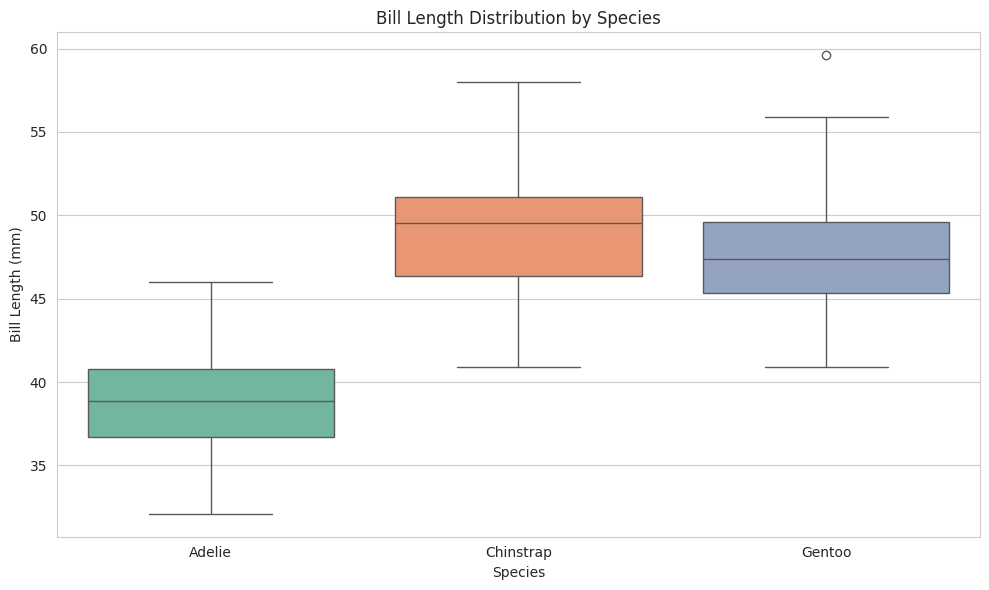

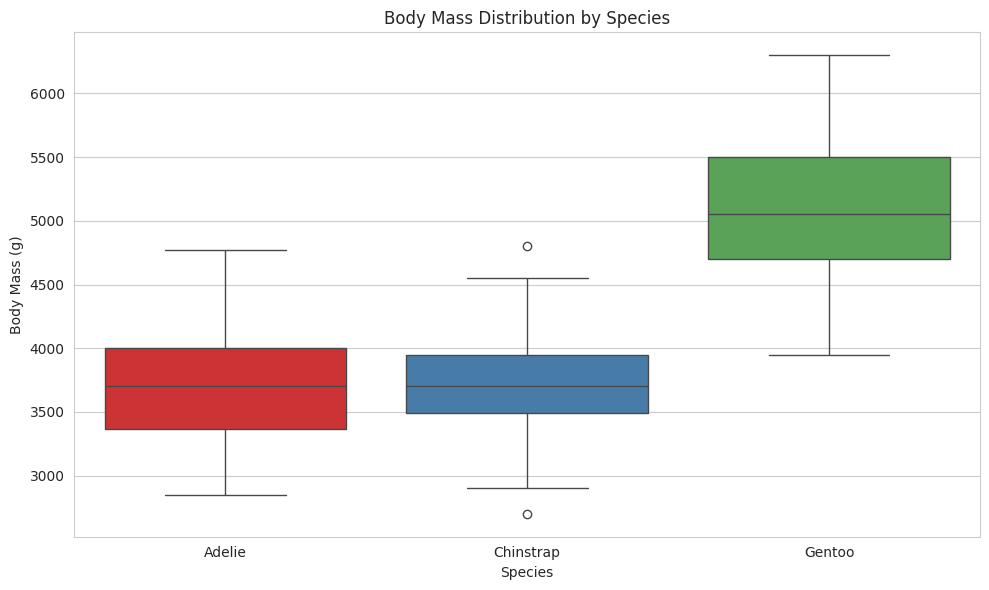

In [8]:
# 8. 종별 부리 길이 박스플롯
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_clean, x='species', y='bill_length_mm', ax=ax, palette='Set2')
ax.set_xlabel('Species')
ax.set_ylabel('Bill Length (mm)')
ax.set_title('Bill Length Distribution by Species')
plt.tight_layout()
plt.savefig('graph_8_boxplot_species.png', dpi=100, bbox_inches='tight')
graph_data['boxplot_1'] = (fig, '종별 부리 길이 박스플롯')
plt.show()

# 9. 종별 체질량 박스플롯
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_clean, x='species', y='body_mass_g', ax=ax, palette='Set1')
ax.set_xlabel('Species')
ax.set_ylabel('Body Mass (g)')
ax.set_title('Body Mass Distribution by Species')
plt.tight_layout()
plt.savefig('graph_9_boxplot_mass.png', dpi=100, bbox_inches='tight')
graph_data['boxplot_2'] = (fig, '종별 체질량 박스플롯')
plt.show()

## 8. 바이올린플롯 시각화

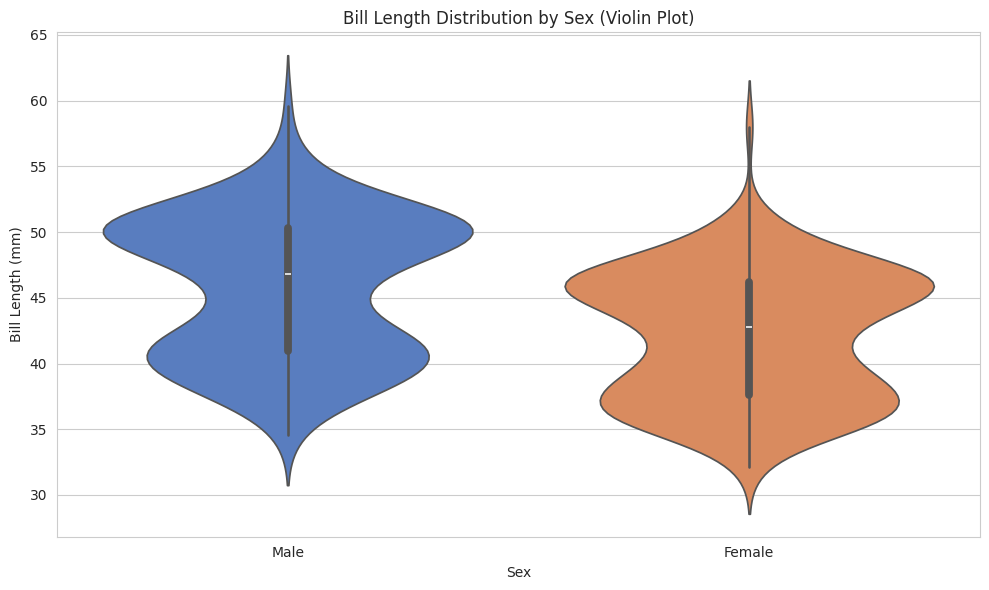

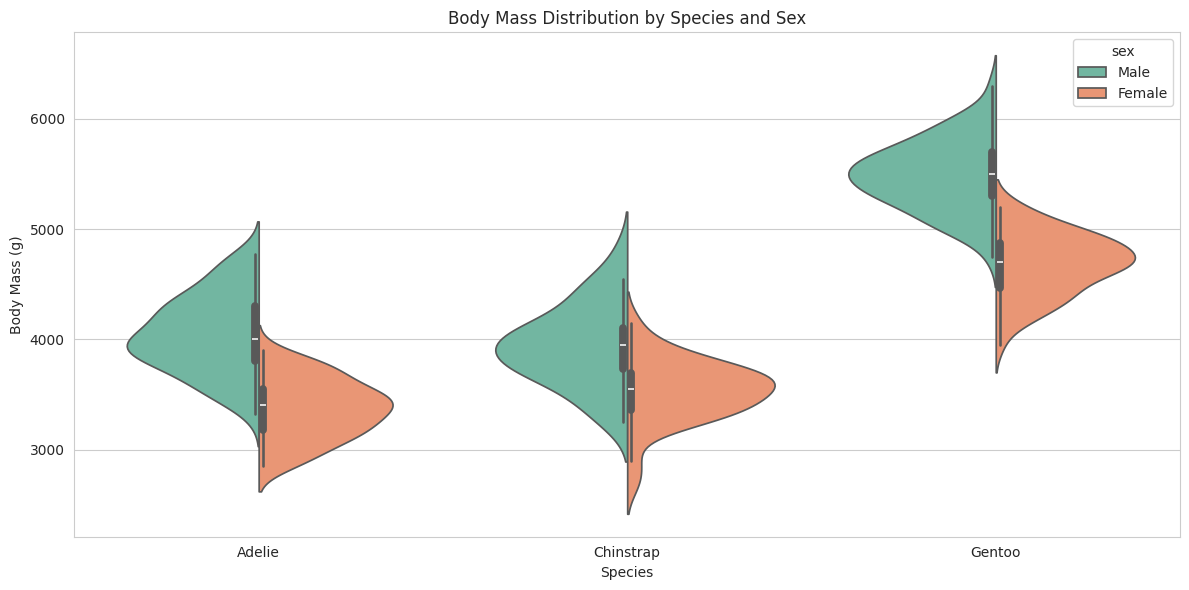

In [9]:
# 10. 성별 부리 길이 바이올린플롯
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df_clean, x='sex', y='bill_length_mm', ax=ax, palette='muted')
ax.set_xlabel('Sex')
ax.set_ylabel('Bill Length (mm)')
ax.set_title('Bill Length Distribution by Sex (Violin Plot)')
plt.tight_layout()
plt.savefig('graph_10_violin_sex.png', dpi=100, bbox_inches='tight')
graph_data['violin_1'] = (fig, '성별 부리 길이 바이올린플롯')
plt.show()

# 11. 종별 및 성별 체질량 바이올린플롯
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=df_clean, x='species', y='body_mass_g', hue='sex', ax=ax, split=True, palette='Set2')
ax.set_xlabel('Species')
ax.set_ylabel('Body Mass (g)')
ax.set_title('Body Mass Distribution by Species and Sex')
plt.tight_layout()
plt.savefig('graph_11_violin_species_sex.png', dpi=100, bbox_inches='tight')
graph_data['violin_2'] = (fig, '종별/성별 체질량 바이올린플롯')
plt.show()

## 9. 히트맵 시각화

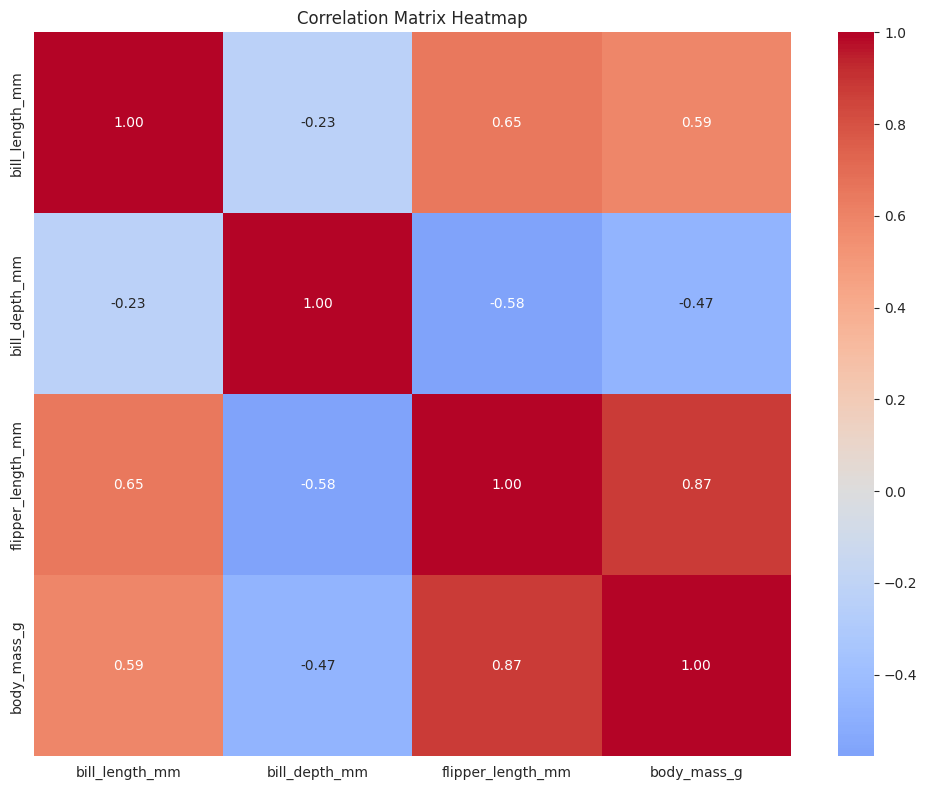

In [10]:
# 12. 상관관계 히트맵
fig, ax = plt.subplots(figsize=(10, 8))
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax, fmt='.2f')
ax.set_title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('graph_12_heatmap_correlation.png', dpi=100, bbox_inches='tight')
graph_data['heatmap_1'] = (fig, '상관관계 히트맵')
plt.show()

## 10. 막대 그래프 시각화

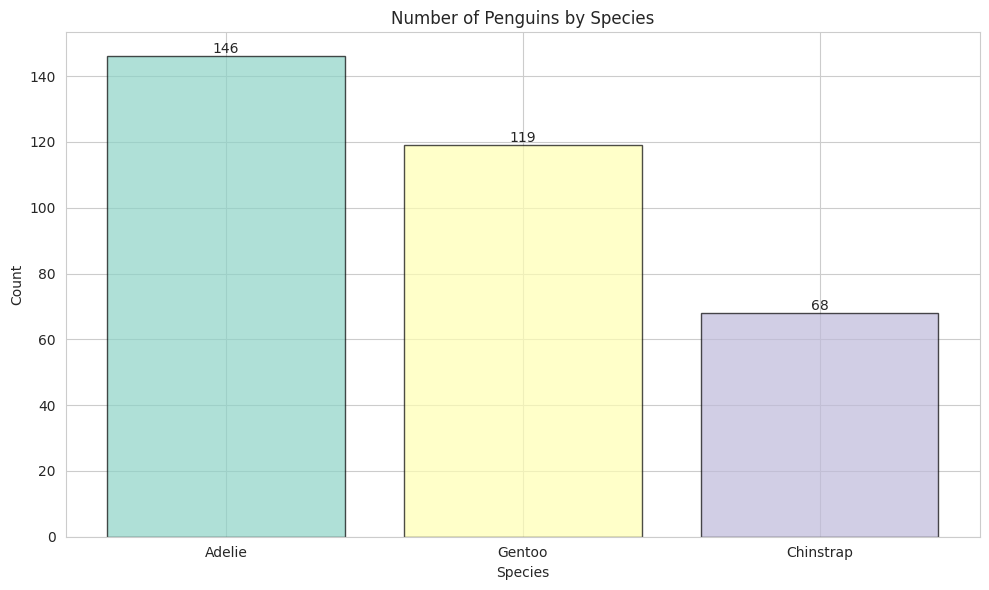

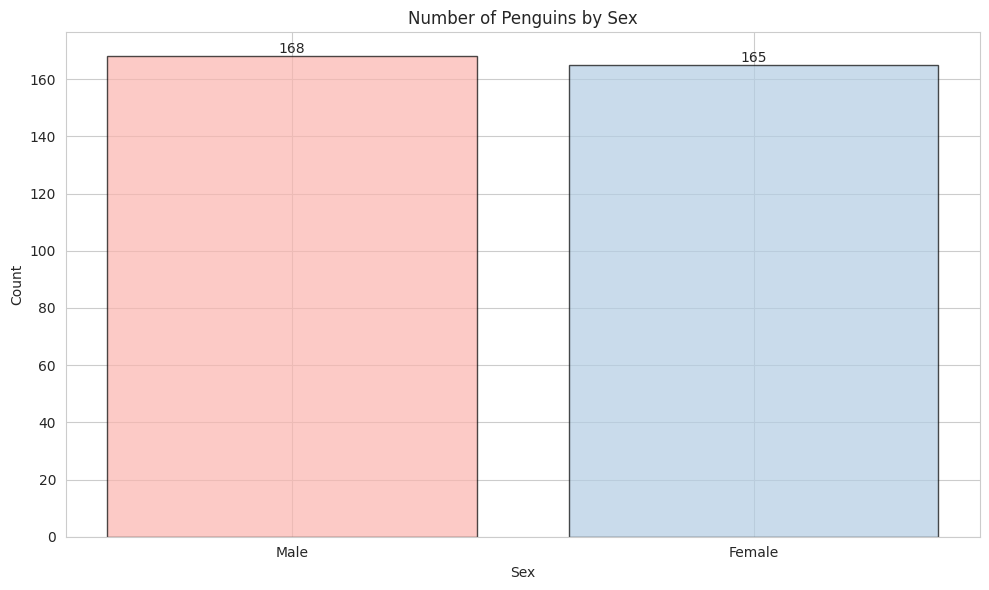

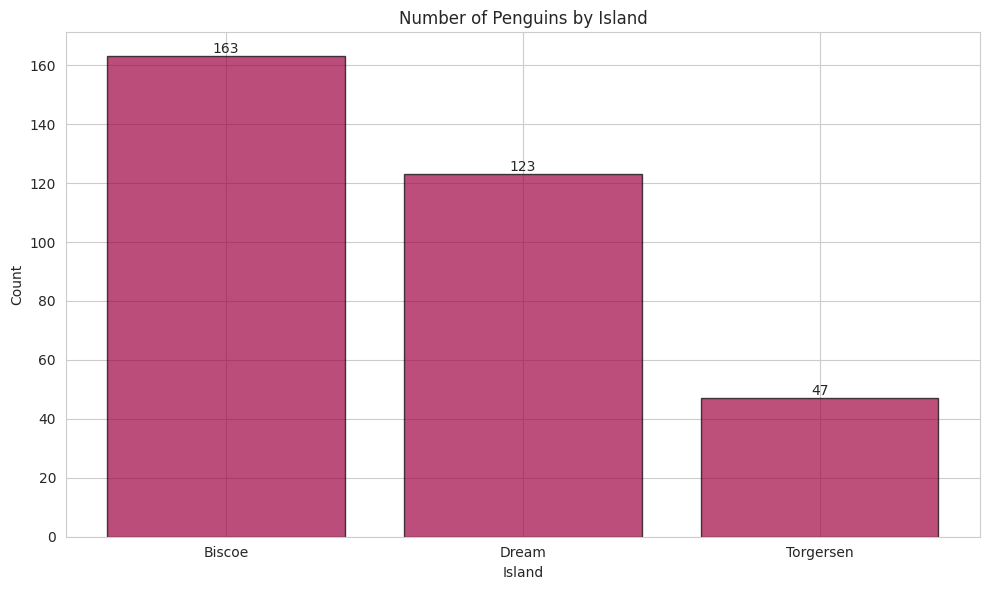

In [11]:
# 13. 종별 개수 막대 그래프
fig, ax = plt.subplots(figsize=(10, 6))
species_count = df_clean['species'].value_counts()
colors = plt.cm.Set3(range(len(species_count)))
bars = ax.bar(species_count.index, species_count.values, color=colors, edgecolor='black', alpha=0.7)
ax.set_xlabel('Species')
ax.set_ylabel('Count')
ax.set_title('Number of Penguins by Species')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('graph_13_bar_species.png', dpi=100, bbox_inches='tight')
graph_data['bar_1'] = (fig, '종별 개수 막대 그래프')
plt.show()

# 14. 성별 개수 막대 그래프
fig, ax = plt.subplots(figsize=(10, 6))
sex_count = df_clean['sex'].value_counts()
colors = plt.cm.Pastel1(range(len(sex_count)))
bars = ax.bar(sex_count.index, sex_count.values, color=colors, edgecolor='black', alpha=0.7)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Number of Penguins by Sex')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('graph_14_bar_sex.png', dpi=100, bbox_inches='tight')
graph_data['bar_2'] = (fig, '성별 개수 막대 그래프')
plt.show()

# 15. 섬별 개수 막대 그래프
fig, ax = plt.subplots(figsize=(10, 6))
island_count = df_clean['island'].value_counts()
colors = plt.cm.Spectral(range(len(island_count)))
bars = ax.bar(island_count.index, island_count.values, color=colors, edgecolor='black', alpha=0.7)
ax.set_xlabel('Island')
ax.set_ylabel('Count')
ax.set_title('Number of Penguins by Island')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('graph_15_bar_island.png', dpi=100, bbox_inches='tight')
graph_data['bar_3'] = (fig, '섬별 개수 막대 그래프')
plt.show()

## 11. 추가 시각화

<Figure size 1400x1200 with 0 Axes>

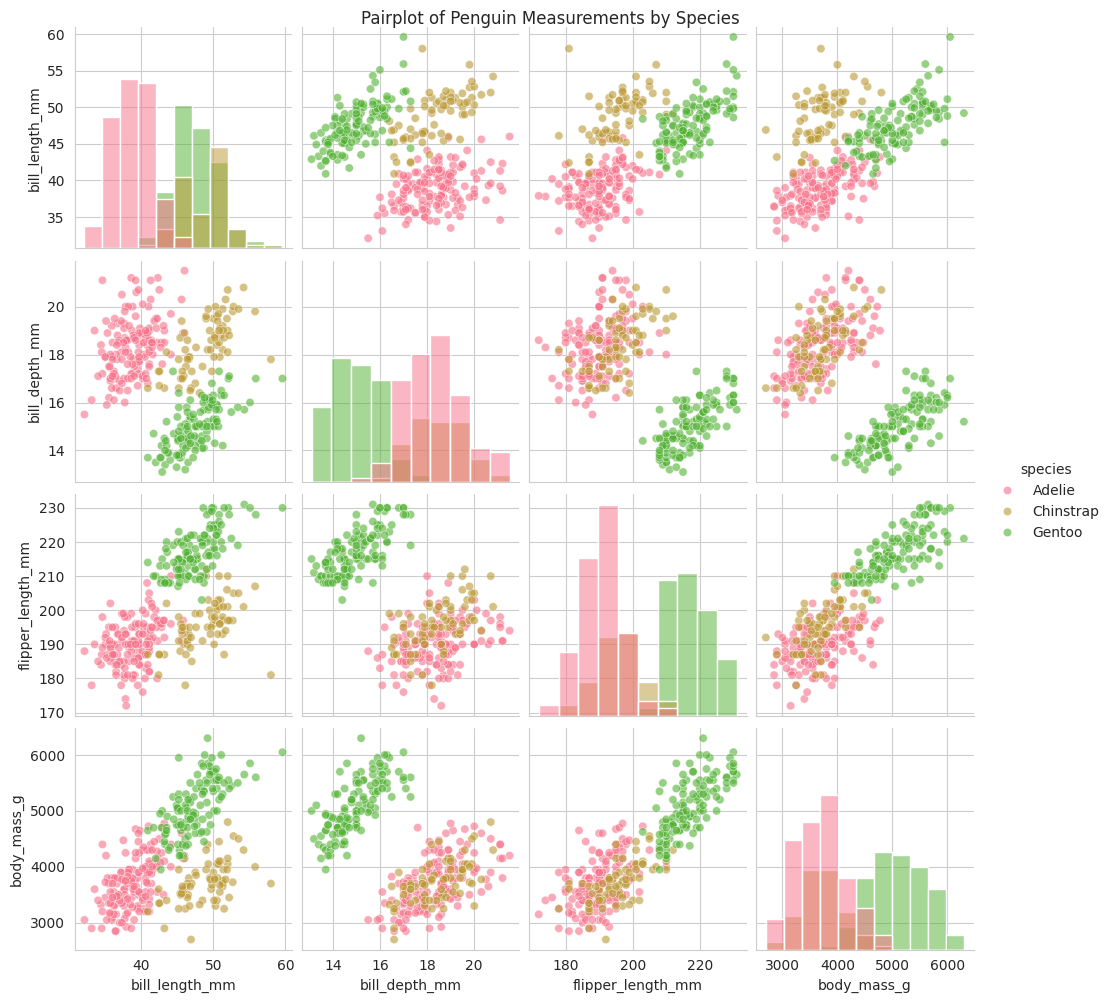

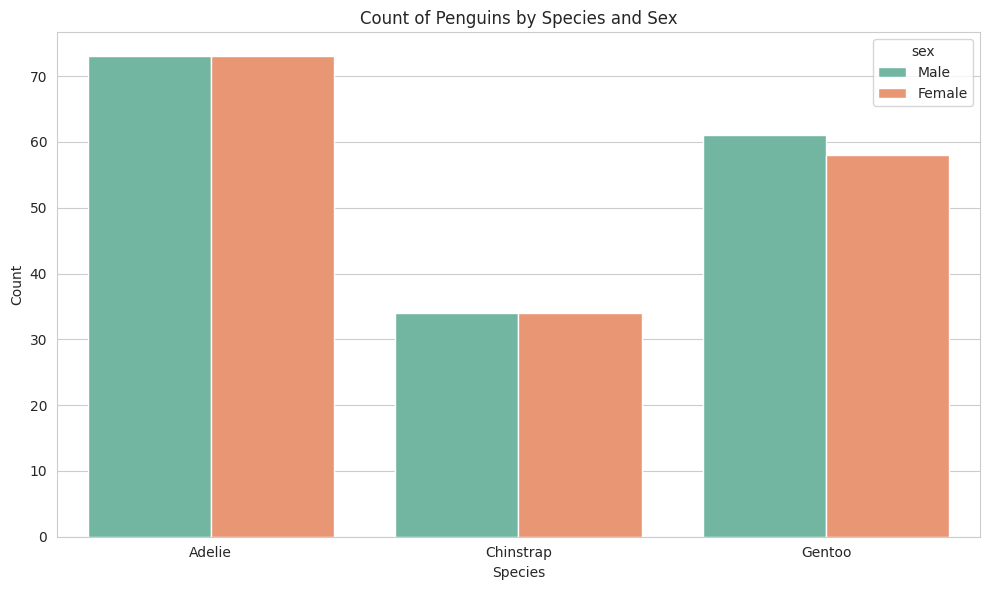

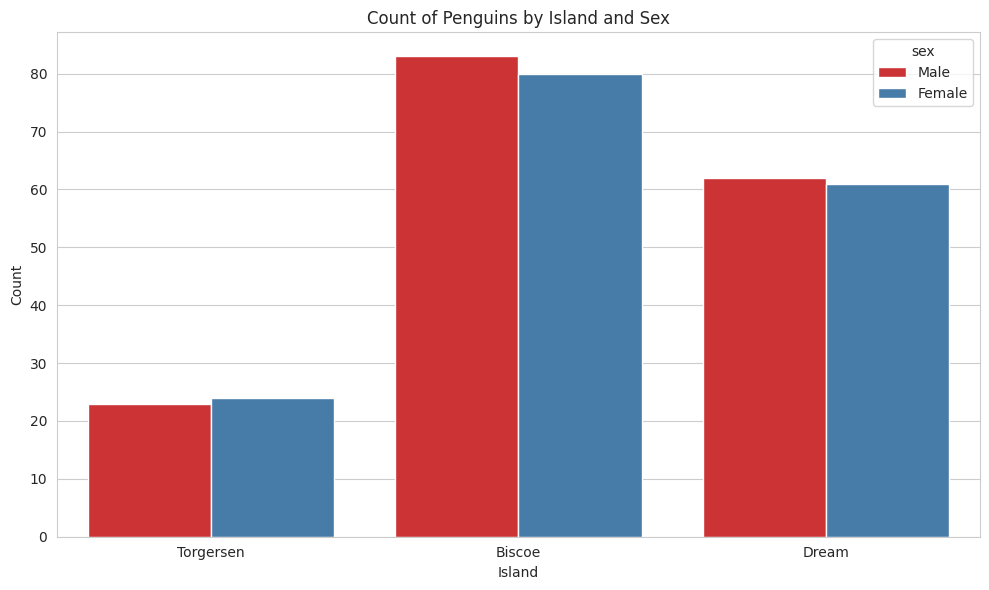

모든 그래프 생성 완료!


In [12]:
# 16. 쌍플롯 (PairPlot) - 수치형 데이터만
fig = plt.figure(figsize=(14, 12))
# 수치형 데이터만 선택
numeric_data = df_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']]
pair_plot = sns.pairplot(numeric_data, hue='species', diag_kind='hist', plot_kws={'alpha': 0.6})
pair_plot.fig.suptitle('Pairplot of Penguin Measurements by Species', y=1.00)
plt.savefig('graph_16_pairplot.png', dpi=100, bbox_inches='tight')
graph_data['pairplot_1'] = (fig, '쌍플롯')
plt.show()

# 17. 카운트플롯 (종과 성별)
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_clean, x='species', hue='sex', ax=ax, palette='Set2')
ax.set_xlabel('Species')
ax.set_ylabel('Count')
ax.set_title('Count of Penguins by Species and Sex')
plt.tight_layout()
plt.savefig('graph_17_countplot_species_sex.png', dpi=100, bbox_inches='tight')
graph_data['countplot_1'] = (fig, '종별 성별 카운트플롯')
plt.show()

# 18. 카운트플롯 (섬과 성별)
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df_clean, x='island', hue='sex', ax=ax, palette='Set1')
ax.set_xlabel('Island')
ax.set_ylabel('Count')
ax.set_title('Count of Penguins by Island and Sex')
plt.tight_layout()
plt.savefig('graph_18_countplot_island_sex.png', dpi=100, bbox_inches='tight')
graph_data['countplot_2'] = (fig, '섬별 성별 카운트플롯')
plt.show()

print("모든 그래프 생성 완료!")

## 12. 교차표 및 피봇테이블 생성

In [13]:
# 교차표와 피봇테이블 데이터 저장
crosstab_pivot_data = {}

# 1. 종과 성별 교차표
print("=" * 60)
print("1. 종(Species)과 성별(Sex) 교차표")
print("=" * 60)
ct_species_sex = pd.crosstab(df_clean['species'], df_clean['sex'], margins=True)
print(ct_species_sex)
crosstab_pivot_data['crosstab_1'] = ('종과 성별 교차표', ct_species_sex)

# 2. 종과 성별 피봇테이블 (평균 부리 길이)
print("\n" + "=" * 60)
print("2. 종과 성별 피봇테이블 (평균 부리 길이)")
print("=" * 60)
pt_bill_length = pd.pivot_table(df_clean, values='bill_length_mm', 
                                 index='species', columns='sex', aggfunc='mean', margins=True)
print(pt_bill_length)
crosstab_pivot_data['pivot_1'] = ('종과 성별 피봇테이블 (평균 부리 길이)', pt_bill_length)

# 3. 종과 섬 교차표
print("\n" + "=" * 60)
print("3. 종(Species)과 섬(Island) 교차표")
print("=" * 60)
ct_species_island = pd.crosstab(df_clean['species'], df_clean['island'], margins=True)
print(ct_species_island)
crosstab_pivot_data['crosstab_2'] = ('종과 섬 교차표', ct_species_island)

# 4. 종과 섬 피봇테이블 (평균 체질량)
print("\n" + "=" * 60)
print("4. 종과 섬 피봇테이블 (평균 체질량)")
print("=" * 60)
pt_mass_island = pd.pivot_table(df_clean, values='body_mass_g', 
                                 index='species', columns='island', aggfunc='mean', margins=True)
print(pt_mass_island)
crosstab_pivot_data['pivot_2'] = ('종과 섬 피봇테이블 (평균 체질량)', pt_mass_island)

# 5. 성별과 섬 교차표
print("\n" + "=" * 60)
print("5. 성별(Sex)과 섬(Island) 교차표")
print("=" * 60)
ct_sex_island = pd.crosstab(df_clean['sex'], df_clean['island'], margins=True)
print(ct_sex_island)
crosstab_pivot_data['crosstab_3'] = ('성별과 섬 교차표', ct_sex_island)

# 6. 성별과 섬 피봇테이블 (평균 부리 깊이)
print("\n" + "=" * 60)
print("6. 성별과 섬 피봇테이블 (평균 부리 깊이)")
print("=" * 60)
pt_depth_island = pd.pivot_table(df_clean, values='bill_depth_mm', 
                                  index='sex', columns='island', aggfunc='mean', margins=True)
print(pt_depth_island)
crosstab_pivot_data['pivot_3'] = ('성별과 섬 피봇테이블 (평균 부리 깊이)', pt_depth_island)

# 7. 종과 성별과 섬 3중 피봇테이블
print("\n" + "=" * 60)
print("7. 종, 성별, 섬 3중 피봇테이블 (평균 날개 길이)")
print("=" * 60)
pt_flipper = pd.pivot_table(df_clean, values='flipper_length_mm', 
                             index=['species', 'sex'], columns='island', aggfunc='mean', margins=True)
print(pt_flipper)
crosstab_pivot_data['pivot_4'] = ('종/성별과 섬 피봇테이블 (평균 날개 길이)', pt_flipper)

print("\n교차표 및 피봇테이블 생성 완료!")

1. 종(Species)과 성별(Sex) 교차표
sex        Female  Male  All
species                     
Adelie         73    73  146
Chinstrap      34    34   68
Gentoo         58    61  119
All           165   168  333

2. 종과 성별 피봇테이블 (평균 부리 길이)
sex           Female       Male        All
species                                   
Adelie     37.257534  40.390411  38.823973
Chinstrap  46.573529  51.094118  48.833824
Gentoo     45.563793  49.473770  47.568067
All        42.096970  45.854762  43.992793

3. 종(Species)과 섬(Island) 교차표
island     Biscoe  Dream  Torgersen  All
species                                 
Adelie         44     55         47  146
Chinstrap       0     68          0   68
Gentoo        119      0          0  119
All           163    123         47  333

4. 종과 섬 피봇테이블 (평균 체질량)
island          Biscoe        Dream    Torgersen          All
species                                                      
Adelie     3709.659091  3701.363636  3708.510638  3706.164384
Chinstrap          NaN  3733

## 13. 마크다운 파일로 결과 저장

In [15]:
# 마크다운 파일로 저장
markdown_content = []

# 제목
markdown_content.append("# 펭귄 데이터셋 분석 보고서\n")
markdown_content.append("생성 날짜: {}".format(pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S")))
markdown_content.append("\n---\n")

# 1. 개요
markdown_content.append("## 1. 데이터셋 개요\n")
markdown_content.append(f"- 총 관측치: {len(df_clean)}개\n")
markdown_content.append(f"- 특성 개수: {len(df_clean.columns)}개\n")
markdown_content.append(f"- 특성 목록: {', '.join(df_clean.columns.tolist())}\n\n")

# 2. 기본 통계
markdown_content.append("## 2. 기본 통계 분석\n\n")
markdown_content.append("### 수치형 데이터 통계\n\n")
markdown_content.append(df_clean.describe().to_markdown())
markdown_content.append("\n\n")

# 3. 범주형 데이터
markdown_content.append("### 범주형 데이터 분포\n\n")
markdown_content.append("#### 종(Species)\n\n")
species_dist = df_clean['species'].value_counts().to_frame()
markdown_content.append(species_dist.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("#### 성별(Sex)\n\n")
sex_dist = df_clean['sex'].value_counts().to_frame()
markdown_content.append(sex_dist.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("#### 섬(Island)\n\n")
island_dist = df_clean['island'].value_counts().to_frame()
markdown_content.append(island_dist.to_markdown())
markdown_content.append("\n\n")

# 4. 상관관계 분석
markdown_content.append("## 3. 상관관계 분석\n\n")
markdown_content.append("수치형 특성 간의 상관관계:\n\n")
markdown_content.append(corr_matrix.to_markdown())
markdown_content.append("\n\n")

# 5. 시각화
markdown_content.append("## 4. 시각화 결과\n\n")

# 산점도
markdown_content.append("### 4.1 산점도\n\n")
scatter_descriptions = [
    "부리 길이 vs 부리 깊이 (종별로 구분)",
    "체질량 vs 부리 길이 (성별로 구분)",
    "날개 길이 vs 체질량 (부리 길이로 색상 표시)"
]
for i, desc in enumerate(scatter_descriptions, 1):
    markdown_content.append(f"- **그래프 {i}: {desc}**\n")
    markdown_content.append(f"  ![Graph {i}](graph_{i+2}_scatter{'_bill' if i==1 else '_mass' if i==2 else '_flipper'}.png)\n\n")

# 히스토그램
markdown_content.append("### 4.2 히스토그램\n\n")
hist_labels = ['부리 길이', '부리 깊이', '날개 길이', '체질량']
for i, label in enumerate(hist_labels, 1):
    markdown_content.append(f"- **그래프 {i+3}: {label} 분포**\n")
    markdown_content.append(f"  ![Graph {i+3}](graph_{i+3}_hist_*.png)\n\n")

# 박스플롯
markdown_content.append("### 4.3 박스플롯\n\n")
markdown_content.append("- **그래프 8: 종별 부리 길이 분포**\n")
markdown_content.append("  ![Graph 8](graph_8_boxplot_species.png)\n\n")
markdown_content.append("- **그래프 9: 종별 체질량 분포**\n")
markdown_content.append("  ![Graph 9](graph_9_boxplot_mass.png)\n\n")

# 바이올린플롯
markdown_content.append("### 4.4 바이올린플롯\n\n")
markdown_content.append("- **그래프 10: 성별 부리 길이 분포**\n")
markdown_content.append("  ![Graph 10](graph_10_violin_sex.png)\n\n")
markdown_content.append("- **그래프 11: 종별/성별 체질량 분포**\n")
markdown_content.append("  ![Graph 11](graph_11_violin_species_sex.png)\n\n")

# 히트맵
markdown_content.append("### 4.5 히트맵\n\n")
markdown_content.append("- **그래프 12: 상관관계 히트맵**\n")
markdown_content.append("  ![Graph 12](graph_12_heatmap_correlation.png)\n\n")

# 막대 그래프
markdown_content.append("### 4.6 막대 그래프\n\n")
markdown_content.append("- **그래프 13: 종별 개수**\n")
markdown_content.append("  ![Graph 13](graph_13_bar_species.png)\n\n")
markdown_content.append("- **그래프 14: 성별 개수**\n")
markdown_content.append("  ![Graph 14](graph_14_bar_sex.png)\n\n")
markdown_content.append("- **그래프 15: 섬별 개수**\n")
markdown_content.append("  ![Graph 15](graph_15_bar_island.png)\n\n")

# 추가 시각화
markdown_content.append("### 4.7 추가 시각화\n\n")
markdown_content.append("- **그래프 16: 쌍플롯 (PairPlot)**\n")
markdown_content.append("  ![Graph 16](graph_16_pairplot.png)\n\n")
markdown_content.append("- **그래프 17: 종별/성별 카운트플롯**\n")
markdown_content.append("  ![Graph 17](graph_17_countplot_species_sex.png)\n\n")
markdown_content.append("- **그래프 18: 섬별/성별 카운트플롯**\n")
markdown_content.append("  ![Graph 18](graph_18_countplot_island_sex.png)\n\n")

# 6. 교차표 및 피봇테이블
markdown_content.append("## 5. 교차표 및 피봇테이블\n\n")

markdown_content.append("### 5.1 종과 성별 교차표\n\n")
markdown_content.append(ct_species_sex.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("### 5.2 종과 성별 피봇테이블 (평균 부리 길이)\n\n")
markdown_content.append(pt_bill_length.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("### 5.3 종과 섬 교차표\n\n")
markdown_content.append(ct_species_island.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("### 5.4 종과 섬 피봇테이블 (평균 체질량)\n\n")
markdown_content.append(pt_mass_island.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("### 5.5 성별과 섬 교차표\n\n")
markdown_content.append(ct_sex_island.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("### 5.6 성별과 섬 피봇테이블 (평균 부리 깊이)\n\n")
markdown_content.append(pt_depth_island.to_markdown())
markdown_content.append("\n\n")

markdown_content.append("### 5.7 종/성별과 섬 피봇테이블 (평균 날개 길이)\n\n")
markdown_content.append(pt_flipper.to_markdown())
markdown_content.append("\n\n")

# 마지막
markdown_content.append("---\n")
markdown_content.append("### 분석 완료\n")
markdown_content.append("이 보고서는 Jupyter Notebook을 통해 자동으로 생성되었습니다.\n")

# 파일로 저장
with open('penguin_analysis_report.md', 'w', encoding='utf-8') as f:
    f.write('\n'.join(markdown_content))

print("마크다운 파일이 'penguin_analysis_report.md'로 저장되었습니다!")

마크다운 파일이 'penguin_analysis_report.md'로 저장되었습니다!
